In [1]:
%pylab inline
%config InlineBackend.figure_format ='retina'

import time

import anndata
import matplotlib.colors as mcolors
import pandas as pd

import plotnine as p

Populating the interactive namespace from numpy and matplotlib


In [2]:
Z_df = pd.read_csv('pij_vae_results\ldvae_1_Z.csv', index_col=0)
W_df = pd.read_csv('pij_vae_results\ldvae_1_W.csv', index_col=0)

In [3]:
Z_df = Z_df.add_prefix('z')
W_df = W_df.add_prefix('w')

In [4]:
def Z_covariance(Z):
    Zcentered = Z - Z.mean(0)
    Zscaled = Z / Z.std(0)
    ZTZ = np.cov(Zscaled.T)
    
    eigen_values, _ = np.linalg.eig(ZTZ)
    singular_values = np.sqrt(eigen_values)
    variance_explained = singular_values / singular_values.sum()

    return ZTZ, variance_explained

In [5]:
_, variance_explained = Z_covariance(Z_df)
idx = np.argsort(variance_explained)[::-1]

In [6]:
variance_explained

array([0.05888818, 0.05672462, 0.05557818, 0.05490362, 0.05446908,
       0.04353938, 0.04373634, 0.04394522, 0.04476023, 0.04573362,
       0.05271604, 0.05219255, 0.04725937, 0.05102356, 0.04777329,
       0.04823501, 0.05037737, 0.04880431, 0.0494931 , 0.04984693])

In [110]:
Z_df_ordered = pd.DataFrame(Z_df.values[:, idx]).add_prefix('z')
Z_df_ordered.index = Z_df.index
W_df_ordered = pd.DataFrame(W_df.values[:, idx]).add_prefix('w')
W_df_ordered.index = W_df.index

In [365]:
adata = anndata.read('pijuan_sala_atlas.h5ad')

In [288]:
W_df_ordered = adata.var.loc[W_df_ordered.index].join(W_df_ordered)

In [372]:
text_shift = {
    (0, 'Fst'): (0.2, -0.2),
    (0, 'Pmp22'): (-0.1, -0.3),
    (0, 'Hoxaas3'): (0.0, 0.3),
    (0, 'Acta2'): (0.0, 0.2),
    (0, 'Nnat'): (0.0, 0.5),
    (0, 'Ifitm1'): (0.0, 0.2),
    
    (1, 'Srgn'): (0., -0.2),
    (1, 'Amn'): (-0.7, 0.),
    
    (2, 'Crabp2'): (0.0, 0.4),
    (2, 'Tdgf1'): (0.0, 0.4),
    (2, 'Cer1'): (-0.6, 0.0),
    (2, 'T'): (-1.3, 0.0),
    
    (3, 'Cdx1'): (0.0, 0.4),
    (3, 'Cdx2'): (-1.0, 0.7),
    (3, 'Cited1'): (-1.6, -0.0),
    (3, 'Phlda2'): (-0.7, 0.0),
    (3, 'T'): (0.0, 0.2),
    (3, 'Ifitm1'): (-0.2, 0.0),
#     (3, 'Rspo2'): (-0.3, 0.0),
#     (3, 'Htr2c'): (0.6, 0.1),
#     (3, 'Col1a1'): (0.0, 0.2),
    
#     (4, 'Ttn'): (0.0, -0.4),
#     (4, 'Sntb1'): (0.0, -0.3),
#     (4, 'Colec12'): (-1.1, 0.1),
#     (4, 'Adam12'): (0.1, 0.4),
#     (4, 'Spon1'): (0.0, 0.2),
#     (4, 'Gm3764'): (-0.2, 0.3),
#     (4, 'C130071C03Rik'): (1.5, -0.35),
    
}

[Hoxaas3, Acta2, Ifitm1, Tnnt2, Nnat, Crabp1, Pmp22, Fst]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]
[Ctsh, Amn, Hbb-y, Apoa4, S100g, Hba-a1, Srgn, Lgals2]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]
[Mesp1, Tdgf1, T, Cer1, Crabp2, Ptn, Lefty2, Srgn]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]
[Hoxaas3, Mesp1, Cdx1, Cited1, Phlda2, Cdx2, T, Ifitm1]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]
[Trh, Hand1, Hbb-bt, mt-Nd2, mt-Co3, mt-Co2, mt-Atp6, mt-Cytb]
Categories (29411, object): [0610005C13Rik, 0610006L08Rik, 0610007P14Rik, 0610009B22Rik, ..., mt-Nd4, mt-Nd4l, mt-Nd5, mt-Nd6]


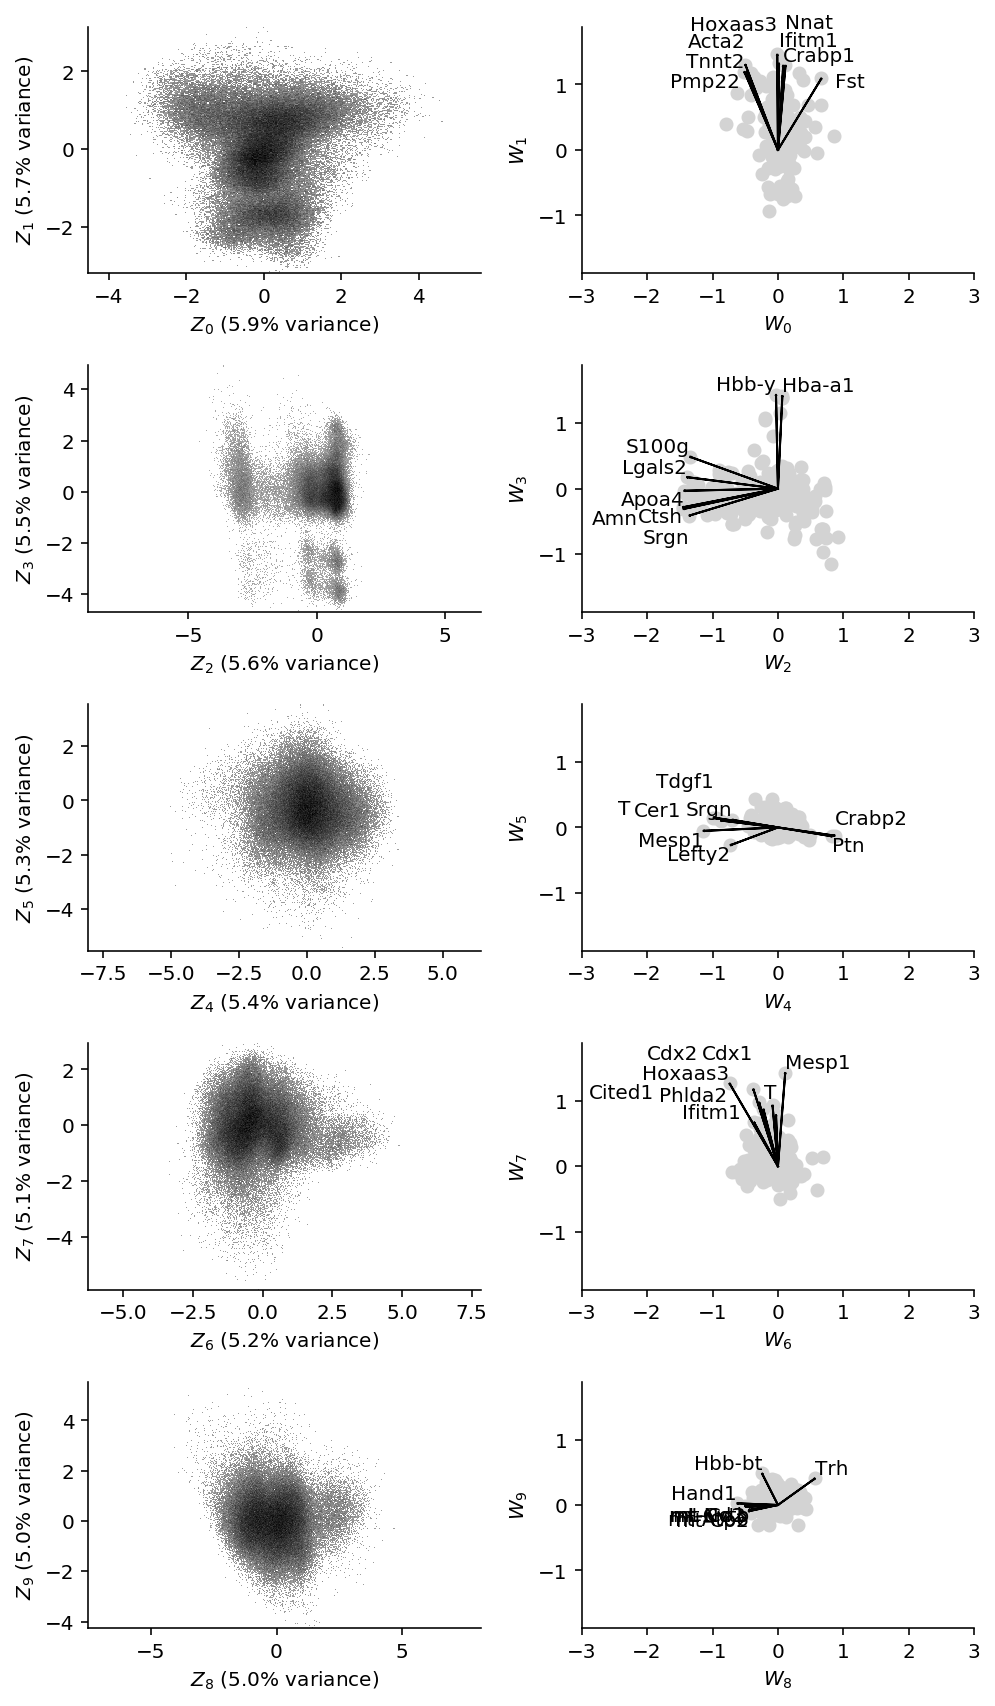

In [373]:
figsize(7, 12)
for i in range(5):
    
    # -- Z plot --
    
    plt.subplot(5, 2, 2 * i + 1)
    
    plt.hist2d(
        Z_df_ordered[f'z{2 * i}'], Z_df_ordered[f'z{2 * i + 1}'],
        bins=256,
        norm=mcolors.PowerNorm(0.25),
        cmap=cm.gray_r,
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$Z_{2 * i}$ ({variance_explained[idx][2 * i]:.1%} variance)')
    plt.ylabel(f'$Z_{2 * i + 1}$ ({variance_explained[idx][2 * i + 1]:.1%} variance)')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # -- W plot --
    
    plt.subplot(5, 2, 2 * i + 2)
    
    w_columns = [f'w{2 * i}', f'w{2 * i + 1}']
    
    plt.scatter(
        W_df_ordered[w_columns[0]], W_df_ordered[w_columns[1]],
        c='lightgrey',
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$W_{2 * i}$')
    plt.ylabel(f'$W_{2 * i + 1}$')
    
    tmp_ = W_df_ordered.copy()
    tmp_['lnth'] = np.linalg.norm(tmp_[w_columns], axis=1)
    
    ggg = (
        tmp_
        .sort_values('lnth', ascending=False)
        .head(8)[['gene_name', 'lnth', *w_columns]]
    )
    print(ggg['gene_name'].values)
    
    texts = []
    arrows = []
    for g, r in ggg.iterrows():
        x_, y_ = r[w_columns[0]], r[w_columns[1]]
        
        ha = 'right'
        if x_ > 0:
            ha = 'left'
            
        va = 'top'
        if y_ > 0:
            va = 'bottom'
            
        arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True))
        
        xs, ys = 0, 0
        if (i, r.gene_name) in text_shift:
            xs, ys = text_shift[(i, r.gene_name)]
        
        texts.append(plt.text(x_ + xs, y_ + ys, r.gene_name, ha=ha, va=va))

    plt.xlim(left=-3, right=3)
    plt.ylim(bottom=-3, top=3)
        
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.tight_layout()
plt.savefig('figures/linear_pij_results.pdf', bbox_inches='tight', dpi=400)

In [112]:
metadata = adata.obs.loc[Z_df_ordered.index]

In [113]:
metadata = metadata.join(Z_df_ordered)

In [115]:
metadata.head().T

index,cell_1,cell_2,cell_3,cell_4,cell_5
barcode,AAAGGCCTCCACAA,AACAAACTCGCCTT,AACAATACCCGTAA,AACACTCTCATTCT,AACAGAGAATCAGC
sample,1,1,1,1,1
stage,E6.5,E6.5,E6.5,E6.5,E6.5
sequencing.batch,1,1,1,1,1
theiler,TS9,TS9,TS9,TS9,TS9
doub.density,0.0431142,1.12971,0,0.0846885,0.112121
doublet,False,False,False,False,False
cluster,2,12,NaN,NaN,3
cluster.sub,4,1,NaN,NaN,7
cluster.stage,2,1,NaN,NaN,4


In [117]:
for ctype in np.unique(metadata['celltype']):
    z_corrs = Z_df_ordered.corrwith((metadata['celltype'] == ctype))
    top_factors = z_corrs.map(np.abs).sort_values(ascending=False).head(3)
    print([f'{z.rjust(3)}: {z_corrs[z]:+.2f}' for z in top_factors.index], ctype)

[' z0: -0.19', 'z12: -0.19', ' z1: +0.12'] Allantois
[' z4: -0.16', 'z10: +0.09', 'z11: +0.07'] Anterior Primitive Streak
[' z5: +0.11', ' z0: +0.11', 'z14: +0.10'] Blood progenitors 1
['z17: +0.23', ' z5: +0.19', ' z9: +0.15'] Blood progenitors 2
['z19: -0.26', 'z13: -0.25', 'z10: -0.21'] Cardiomyocytes
['z19: +0.20', ' z7: +0.10', 'z14: -0.07'] Caudal Mesoderm
['z19: +0.29', ' z7: +0.12', 'z14: -0.09'] Caudal epiblast
['z19: +0.08', 'z14: -0.08', 'z18: -0.08'] Caudal neurectoderm
[' z4: -0.15', 'z11: +0.09', 'z12: +0.09'] Def. endoderm
[' z0: +0.26', ' z7: -0.24', 'z19: +0.20'] Endothelium
['z17: -0.38', 'z16: -0.33', ' z7: -0.28'] Epiblast
['z17: +0.28', ' z1: -0.23', ' z3: +0.20'] Erythroid1
['z17: +0.19', ' z1: -0.17', ' z3: +0.16'] Erythroid2
['z17: +0.33', ' z1: -0.29', ' z3: +0.26'] Erythroid3
['z16: +0.61', ' z1: -0.53', ' z8: -0.33'] ExE ectoderm
[' z2: -0.78', 'z16: -0.29', ' z1: -0.18'] ExE endoderm
[' z7: +0.16', ' z0: -0.13', ' z1: +0.12'] ExE mesoderm
[' z4: +0.34', ' z0

In [374]:
vardata = W_df_ordered

In [140]:
from matplotlib.patches import Ellipse

In [155]:
from scipy import stats

In [210]:
def make_kde(x1, x2):
    dx1 = (x1.max() - x1.min()) / 10
    dx2 = (x2.max() - x2.min()) / 10

    x1min = x1.min() - dx1
    x2min = x2.min() - dx2
    x1max = x1.max() + dx1
    x2max = x2.max() + dx2

    xx1, xx2 = np.mgrid[x1min:x1max:100j, x2min:x2max:100j]

    positions = np.vstack([xx1.ravel(), xx2.ravel()])
    values = np.vstack([x1, x2])

    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx1.shape)
    
    return xx1, xx2, f

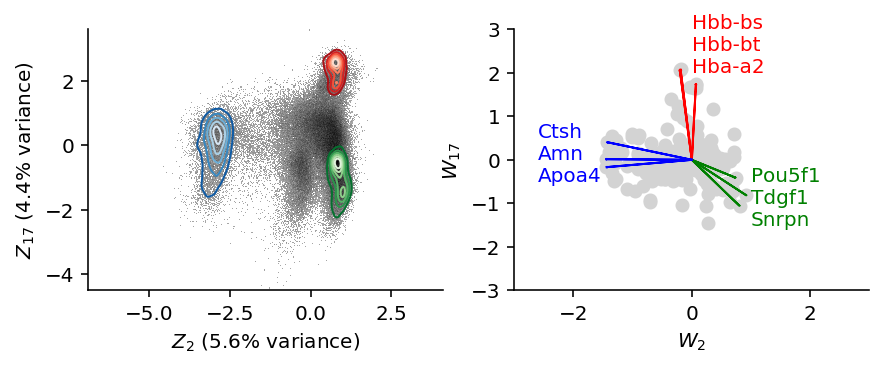

In [367]:
figsize(7, 12 / 5)

plt.subplot(1, 2, 1)

plt.hist2d(
    Z_df_ordered[f'z2'], Z_df_ordered[f'z17'],
    bins=256,
    norm=mcolors.PowerNorm(0.25),
    cmap=cm.gray_r,
    rasterized=True
)

plt.axis('equal')
plt.xlabel('$Z_2$ ' + f'({variance_explained[idx][2]:.1%} variance)')
plt.ylabel('$Z_{17}$ ' + f'({variance_explained[idx][17]:.1%} variance)')

ax = plt.gca()

color_maps = [cm.Reds_r, cm.Blues_r, cm.Greens_r]
cell_types = ['Erythroid3', 'ExE endoderm', 'Epiblast']
for color, ctype in zip(color_maps, cell_types):
    X = metadata.query('celltype == @ctype')[['z2', 'z17']]
    xx1, xx2, f = make_kde(X['z2'], X['z17'])
    cset = ax.contour(
        xx1,
        xx2,
        f,
        levels=6,
        cmap=color,
        linewidths=1.
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(1, 2, 2)

plt.scatter(
    W_df_ordered['w2'], W_df_ordered['w17'],
    c='lightgrey',
    rasterized=True
)


arrows = []
genes = ['Hbb-bs', 'Hbb-bt', 'Hba-a2']
for g in genes:
    x_, y_ = vardata.query('gene_name == @g')[['w2', 'w17']].values[0]

    arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True, color='r'))
    
plt.text(0, 2, '\n'.join(genes), color='r')

arrows = []
genes = ['Pou5f1', 'Tdgf1', 'Snrpn']
for g in genes:
    x_, y_ = vardata.query('gene_name == @g')[['w2', 'w17']].values[0]

    arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True, color='g'))

plt.text(1, -1.5, '\n'.join(genes), color='g')

arrows = []
genes = ['Ctsh', 'Amn', 'Apoa4']
for g in genes:
    x_, y_ = vardata.query('gene_name == @g')[['w2', 'w17']].values[0]

    arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True, color='b'))

plt.text(-2.6, -0.5, '\n'.join(genes), color='b')


plt.xlim(left=-3, right=3)
plt.ylim(bottom=-3, top=3)

plt.xlabel('$W_{2}$')
plt.ylabel('$W_{17}$')

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('figures/linear_pij_results_celltypes.pdf', bbox_inches='tight', dpi=400)

In [249]:
vardata.sort_values('w17', ascending=False)[['w17', 'gene_name']].head(10)

,w17,gene_name
ENSMUSG00000052305,2.080350,Hbb-bs
ENSMUSG00000073940,2.063682,Hbb-bt
ENSMUSG00000069917,1.746188,Hba-a2
ENSMUSG00000069919,1.715572,Hba-a1
ENSMUSG00000052187,1.684341,Hbb-y
ENSMUSG00000055609,1.661883,Hba-x
ENSMUSG00000052217,1.654988,Hbb-bh1
ENSMUSG00000070803,1.388891,Cited4
ENSMUSG00000026418,1.233293,Tnni1
ENSMUSG00000032698,1.175712,Lmo2


In [250]:
vardata.sort_values('w2', ascending=False)[['w2', 'gene_name']].head(10)

,w2,gene_name
ENSMUSG00000024406,0.920698,Pou5f1
ENSMUSG00000032494,0.805635,Tdgf1
ENSMUSG00000102252,0.739475,Snrpn
ENSMUSG00000066652,0.726761,Lefty2
ENSMUSG00000000184,0.716637,Ccnd2
ENSMUSG00000060591,0.711454,Ifitm2
ENSMUSG00000029838,0.705371,Ptn
ENSMUSG00000021765,0.687156,Fst
ENSMUSG00000030544,0.687121,Mesp1
ENSMUSG00000025219,0.676152,Fgf8


In [251]:
vardata.sort_values('w2', ascending=False)[['w2', 'gene_name']].tail(10)

,w2,gene_name
ENSMUSG00000061808,-1.293951,Ttr
ENSMUSG00000024503,-1.300672,Spink1
ENSMUSG00000001827,-1.311129,Folr1
ENSMUSG00000040808,-1.345193,S100g
ENSMUSG00000020077,-1.355019,Srgn
ENSMUSG00000043501,-1.392063,Lgals2
ENSMUSG00000024391,-1.397293,Apom
ENSMUSG00000032080,-1.434331,Apoa4
ENSMUSG00000021278,-1.447519,Amn
ENSMUSG00000032359,-1.453882,Ctsh
